In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
df=yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-06-08,31151.480469,31253.691406,29944.404297,30214.355469,30214.355469,30242059107
2022-06-09,30215.279297,30609.310547,30020.265625,30111.998047,30111.998047,21692004719
2022-06-10,30110.330078,30245.808594,28978.146484,29083.804688,29083.804688,29867476527


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


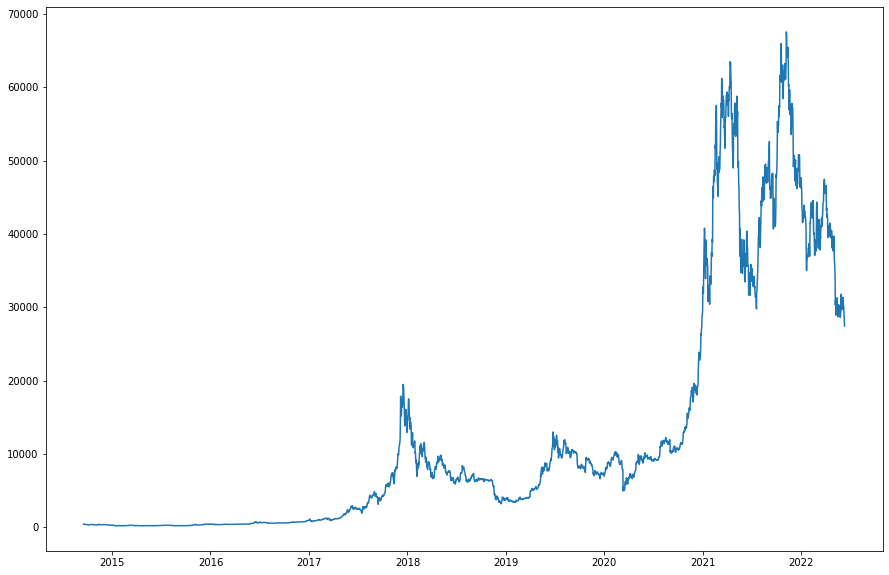

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df.index,df['Adj Close'])

# Creating Traning and Testing sets

In [ ]:
to_row=int(len(df)*0.9)
to_row
training_data=list(df[0:to_row]['Adj Close'])
testing_data=list(df[to_row:]['Adj Close'])
training_data

Visualizing the train_test split

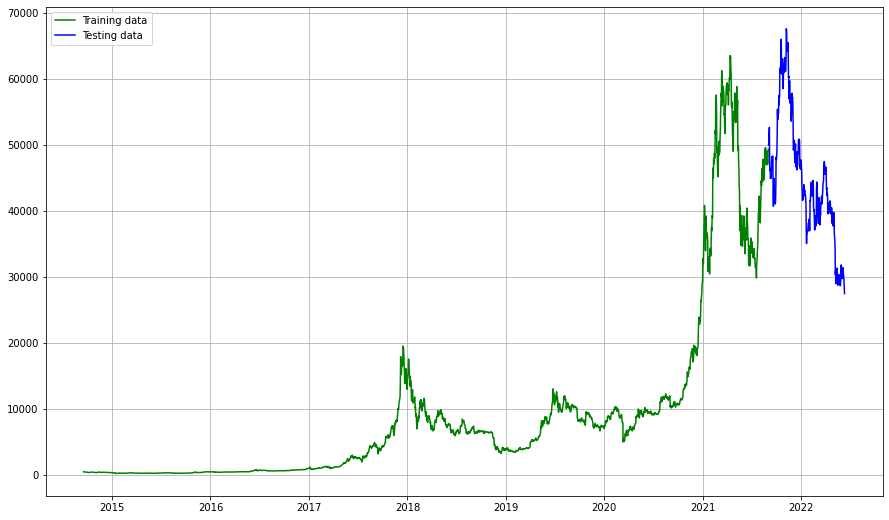

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)
plt.xlabel='Date'
plt.ylabel='Prices'
plt.plot(df[0:to_row]['Adj Close'],'green',label='Training data')
plt.plot(df[to_row:]['Adj Close'],'blue',label='Testing data')
plt.legend()

# ARIMA


In [ ]:
model_predictions=[]
no_of_test_obs=len(testing_data)
no_of_test_obs

283

In [ ]:
for i in range(no_of_test_obs):
  model=ARIMA(training_data, order = (4,1,0))
  model_fit=model.fit()
  output=model_fit.forecast()
  
  yhat=list(output[0])[0]
  model_predictions.append(yhat)
  actual_test_value=testing_data[i]
  training_data.append(actual_test_value)

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 2824
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -22889.519
Method:                       css-mle   S.D. of innovations            801.443
Date:                Sun, 12 Jun 2022   AIC                          45791.037
Time:                        13:03:07   BIC                          45826.713
Sample:                             1   HQIC                         45803.909
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8808     15.376      0.643      0.521     -20.255      40.017
ar.L1.D.y     -0.0316      0.019     -1.682      0.093      -0.068       0.005
ar.L2.D.y      0.0004      0.019      0.021      0.983      -0.036       0.037
ar.L3.D.y      0.0167      0.019      0.888      0.375      -0.020       0.054
ar.L4.D.y      0.0337      0.019      1.794      0.073      -0.003       0.071
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2581           -0.0000j            2.2581           -0.0000
AR.2           -0.1664           -2.3230j            2.3289           -0.2614
AR.3           -0.1664           +2.3230j            2.3289            0.2614
AR.4           -2.4206           -0.0000j            2.4206           -0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
len(model_predictions)

283

In [ ]:
date_range=df[to_row:].index

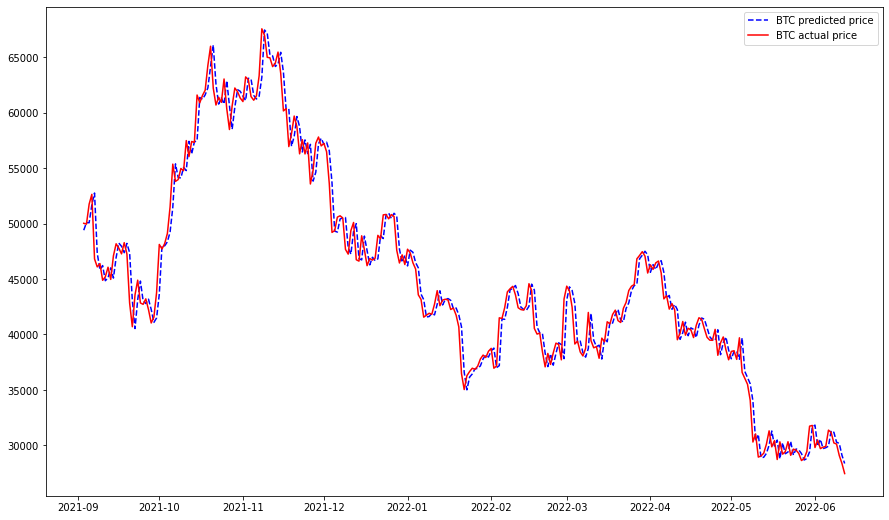

In [ ]:
plt.figure(figsize=(15,9))

plt.plot(date_range,model_predictions,color='blue',  linestyle = 'dashed', label = "BTC predicted price")
plt.plot(date_range,testing_data,color='red',  label = "BTC actual price")
plt.legend()


In [ ]:
#calculate MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mean_absolute_error(model_predictions,
                   testing_data)/100

11.484594167954045

So our model achived a mean absolute error average of around 10% meaning out time series forecasting model was 90% accurate. 